# หนังสือ Data Science วิเคราะห์การตลาด ด้วย Python
---
### บทที่ 8 การคาดการณ์การหยุดใช้สินค้าหรือบริการ

In [2]:
# ตัวอย่างที่ 8.1
import pandas as pd
data = pd.read_csv("data/Shill_Bidding_Dataset.csv")

# Drop columns which are irrelevant to our case
data.drop(["Record_ID","Auction_ID","Bidder_ID"], axis=1,
          inplace=True)
data.head(2)

# split data
X = data.drop("Class",axis=1)
y = data["Class"]

# Split the dataset into training and testing sets 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=1,
                                                 stratify=y)
print("Training dataset size: {}, Testing dataset size: {}"
      .format(X_train.shape, X_test.shape))

# Fit the model using linear regression
from sklearn import linear_model
linear = linear_model.LinearRegression()
linear.fit(X_train,y_train)

linear.predict(X_test)[:10]

y_test[:10].values

print("Score on training dataset: {},\n" "Score on testing dataset: {}"\
      .format(linear.score(X_train,y_train),
              linear.score(X_test,y_test))) 

# Fit the model using logistic regression
logit = linear_model.LogisticRegression()
logit.fit(X_train,y_train)

logit.predict(X_test)[:10]

print("Score on training dataset: {},\n" "Score on testing dataset: {}"\
      .format(logit.score(X_train,y_train),
              logit.score(X_test,y_test))) 

Training dataset size: (4424, 9), Testing dataset size: (1897, 9)
Score on training dataset: 0.8166836356918418, Score on testing dataset: 0.8119909602893054
Score on training dataset: 0.9794303797468354, Score on testing dataset: 0.9715340010542962


### OSEMN
####  1) Obtaining the data

In [1]:
# ตัวอย่างที่ 8.2 
import pandas as pd

# Reading the data using pandas
data= pd.read_csv('data/Churn_Modelling.csv')
data.head()

# number of rows and columns
len(data)
data.shape

(10000, 12)

####  2) Scrubbing the Data
####  - missing values

In [1]:
# ตัวอย่างที่ 8.3 
import pandas as pd
data= pd.read_csv('data/Churn_Modelling.csv')

# missing values
data.isnull().values.any()

# columns having missing values?
data.isnull().any()

# missing values in Gender, age and EstimatedSalary
data[["EstimatedSalary","Age", "HasCrCard"]].describe()

# HasCrCard has value:0,1 hence needs to be changed to category
data['HasCrCard'].value_counts()

# No of missing Values present
data.isnull().sum()

## Percentage of missing Values present
round(data.isnull().sum()/len(data)*100, 2)

## Checking the datatype of the missing columns
data[["Gender","Age","EstimatedSalary"]].dtypes

# impute missing values
mean_value=data['EstimatedSalary'].mean()
data['EstimatedSalary']=data['EstimatedSalary'].fillna(mean_value)

data['Gender'].value_counts()
data['Gender']=data['Gender'].fillna(data['Gender']\
                                     .value_counts().idxmax())

data['Age'].mode()
mode_value = data['Age'].mode()
data['Age']=data['Age'].fillna(mode_value[0])

##checking for any missing values
data.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool

####  2) Scrubbing the Data (ต่อ)
####  - renaming columns และ changing the data type

In [2]:
# ตัวอย่างที่ 8.4 (ทำต่อจากตัวอย่าง 8.3)
data.columns
data = data.rename(columns={'CredRate': 'CreditScore',
                            'ActMem' : 'IsActiveMember',
                            'Prod Number': 'NumOfProducts',
                            'Exited':'Churn'}) 
data.columns

# drop the customer ID
data.drop(labels=['CustomerId'], axis=1,inplace = True)
data.columns

data.dtypes
# Changing the data type
data["Geography"] = data["Geography"].astype('category')
data["Gender"] = data["Gender"].astype('category')
data["HasCrCard"] = data["HasCrCard"].astype('category')
data["Churn"] = data["Churn"].astype('category')
data["IsActiveMember"] = data["IsActiveMember"].astype('category')
data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

####  3) Exploring the Data

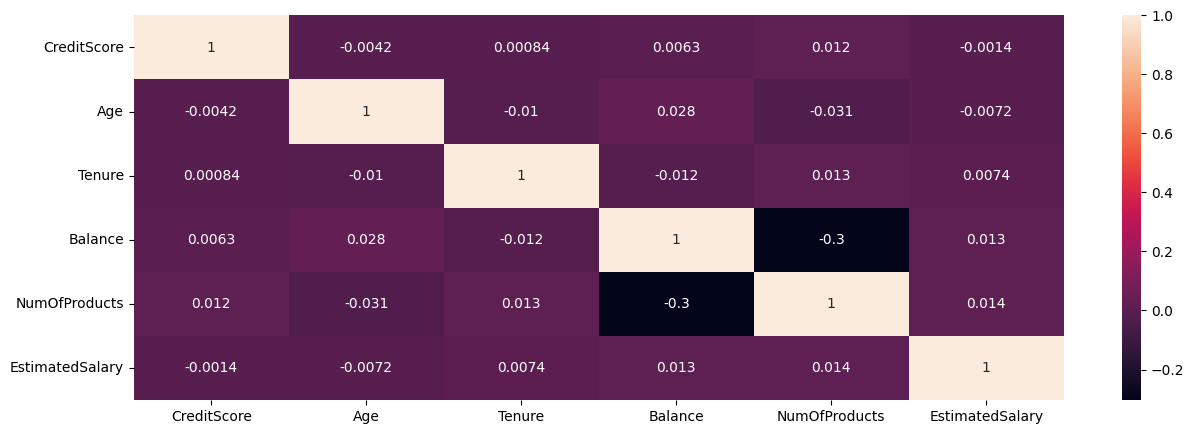

In [8]:
sns.heatmap(data_corr, annot=True);

In [ ]:
# ตัวอย่างที่ 8.5
# Exploring the data
data['Churn'].value_counts(0)
data['Churn'].value_counts(1)*100
data['HasCrCard'].value_counts(1)*100
data.describe()

# เลือกเฉพาะคอลัมน์ที่เป็นค่าต่อเนื่อง
summary_churn = data[['CreditScore','Age','Tenure','Balance',
                      'NumOfProducts','EstimatedSalary']]\
                        .groupby(data.Churn)
summary_churn.mean()
summary_churn.median()

# correlation
data_corr = data[['CreditScore','Age','Tenure','Balance',
                      'NumOfProducts','EstimatedSalary']].corr()
data_corr

# heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5)) 
sns.heatmap(data_corr, annot=True);

####  3) Exploring the Data (ต่อ)
####  - Visualizing the Data

In [ ]:
# ตัวอย่าง 8.6
# histplot
f, axes = plt.subplots(ncols=3, figsize=(15,4)) 
sns.histplot(data.EstimatedSalary, kde=True,
             ax=axes[0]).set_title('EstimatedSalary') 
axes[0].set_ylabel('No of Customers') 
sns.histplot(data.Age, kde=True,
             ax=axes[1]).set_title('Age') 
axes[1].set_ylabel('No of Customers') 
sns.histplot(data.Balance, kde=True,
             ax=axes[2]).set_title('Balance') 
axes[2].set_ylabel('No of Customers');

# countplot
plt.figure(figsize=(15,3)) 
p=sns.countplot(y="Gender",hue='Churn',data=data) 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Churn Distribution by Gender');

plt.figure(figsize=(15,4)) 
p=sns.countplot(x='Geography',hue='Churn',data=data) 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Geography Distribution');

plt.figure(figsize=(15,4)) 
p=sns.countplot(x='NumOfProducts',hue='Churn',data=data) 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Distribution by Product');

# kdeplot
plt.figure(figsize=(15,3)) 
ax=sns.kdeplot(data.loc[(data['Churn']==0),'Age'],
               label='no churn') 
ax=sns.kdeplot(data.loc[(data['Churn']==1),'Age'],
               label='churn') 
ax.set(xlabel='Customer Age', ylabel='Frequency') 
plt.title('Customer Age - churn vs no churn');
plt.legend();

plt.figure(figsize=(15,3)) 
ax=sns.kdeplot(data.loc[(data['Churn']==0),'Balance'],
               label='no churn') 
ax=sns.kdeplot(data.loc[(data['Churn']==1),'Balance'],
               label='churn')
ax.set(xlabel='Customer Balance', ylabel='Frequency') 
plt.title('Customer Balance - churn vs no churn')
plt.legend();

plt.figure(figsize=(15,3)) 
ax=sns.kdeplot(data.loc[(data['Churn']==0),
                        'CreditScore'], label='no churn')
ax=sns.kdeplot(data.loc[(data['Churn']==1),
                        'CreditScore'], label='churn') 
ax.set(xlabel='CreditScore', ylabel='Frequency') 
plt.title('Customer CreditScore - churn vs no churn') 
plt.legend();

# barplot
plt.figure(figsize=(16,3)) 
p=sns.barplot(x='NumOfProducts',y='Balance', hue='Churn',
              data=data) 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Number of Product VS Balance');

In [50]:
# กิจกรรมที่ 8.1
#import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_csv(r'data/Telco_Churn_Data.csv')

# ตรวจสอบข้อมูล
data.head()
len(data)
data.shape
data.isnull().values.any()
data.info()

## Bonus method for renaming the columns
data.columns=data.columns.str.replace(' ','_')

# Fix typo in Avg_Hours_WorkOrderOpenned column
data['Avg_Hours_WorkOrderOpened']=data['Avg_Hours_WorkOrderOpenned']
# Let's drop the older column (with typo)
data.drop(["Avg_Hours_WorkOrderOpenned"], axis=1, inplace=True)

# ตรวจสอบข้อมูล หลังจากเปลี่ยนชื่อ-ลบ คอลัมน์
data.columns

# summarize
data.describe()
data.describe(include='object')

# เปลี่ยนประเภทของคอลัมน์
data['Target_Code']=data.Target_Code.astype('object') 
data['Condition_of_Current_Handset']=\
                data.Condition_of_Current_Handset.astype('object') 
data['Current_TechSupComplaints']=\
                data.Current_TechSupComplaints.astype('object') 
data['Target_Code']=data.Target_Code.astype('int64') 

data.describe(include='object')

# ตรวจสอบข้อมูล เพื่อแทนที่ค่าสูญหาย
## Percentage of missing Values present
round(data.isnull().sum()/len(data)*100, 2)
## value_counts()
data.Complaint_Code.value_counts()
data.Condition_of_Current_Handset.value_counts()

## fillna()
data['Complaint_Code']=data['Complaint_Code']\
                        .fillna(value='Billing Problem') 
data['Condition_of_Current_Handset']=\
                data['Condition_of_Current_Handset'].fillna(value=1) 
data['Condition_of_Current_Handset']=\
                data.Condition_of_Current_Handset.astype('object') 

# Target_Churn
data['Target_Churn'].value_counts(0)
data['Target_Churn'].value_counts(1)*100

## บันทึกลงไฟล์ใหม่ ##
data.to_csv('data/Telco_Churn_Data_edit.csv')

# correlation
corr = data.corr() 
plt.figure(figsize=(15,8)) 
sns.heatmap(corr, annot=True) 
corr 

### Univariate Analysis
f, axes = plt.subplots(ncols=3, figsize=(15, 6)) 
sns.histplot(data.Avg_Calls_Weekdays, kde=True,
             ax=axes[0]).set_title('Avg_Calls_Weekdays') 
axes[0].set_ylabel('No of Customers') 
sns.histplot(data.Avg_Calls, kde=True,
             ax=axes[1]).set_title('Avg_Calls') 
axes[1].set_ylabel('No of Customers') 
sns.histplot(data.Current_Bill_Amt, kde=True,
             ax=axes[2]).set_title('Current_Bill_Amt') 
axes[2].set_ylabel('No of Customers') 

### Bivariate Analysis
plt.figure(figsize=(17,10)) 
p=sns.countplot(y="Complaint_Code", hue='Target_Churn', data=data) 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Complaint Code Distribution');

plt.figure(figsize=(15,4)) 
p=sns.countplot(y="Acct_Plan_Subtype",
                hue='Target_Churn', data=data) 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Acct_Plan_Subtype Distribution');

plt.figure(figsize=(15,4)) 
p=sns.countplot(y="Current_TechSupComplaints",
                hue='Target_Churn', data=data) 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Current_TechSupComplaints Distribution');

plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0),
                        'Avg_Days_Delinquent'],label='no churn') 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1),
                        'Avg_Days_Delinquent'],label='churn') 
ax.set(xlabel='Average No of Days Deliquent/Defaulted from paying',
       ylabel='Frequency') 
plt.title('Average No of Days Deliquent/Defaulted from paying')
plt.legend();

plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0),
                        'Account_Age'], label='no churn') 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1),
                        'Account_Age'], label='churn') 
ax.set(xlabel='Account_Age', ylabel='Frequency') 
plt.title('Account_Age - churn vs no churn') 
plt.legend();

plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0),
                        'Percent_Increase_MOM'],label='no churn') 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1),
                        'Percent_Increase_MOM'],label='churn') 
ax.set(xlabel='Percent_Increase_MOM', ylabel='Frequency') 
plt.title('Percent_Increase_MOM- churn vs no churn')
plt.legend();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target Churn                  4708 non-null   object 
 1   Target Code                   4708 non-null   int64  
 2   Current Bill Amt              4708 non-null   int64  
 3   Avg Calls                     4708 non-null   float64
 4   Avg Calls Weekdays            4708 non-null   float64
 5   Account Age                   4708 non-null   int64  
 6   Percent Increase MOM          4708 non-null   float64
 7   Acct Plan Subtype             4708 non-null   object 
 8   Complaint Code                4701 non-null   object 
 9   Avg Days Delinquent           4708 non-null   float64
 10  Current TechSupComplaints     4708 non-null   int64  
 11  Current Days OpenWorkOrders   4708 non-null   float64
 12  Equipment Age                 4708 non-null   int64  
 13  Con

ValueError: could not convert string to float: 'No Churn'

In [ ]:
## code บางส่วนจากตัวอย่าง 8.2-8.4 บันทึกลงในไฟล์ Churn_Modelling_edit.csv ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_csv('data/Churn_Modelling.csv')

mean_value=data['EstimatedSalary'].mean()
data['EstimatedSalary']=data['EstimatedSalary'].fillna(mean_value)
data['Gender'].value_counts()
data['Gender']=data['Gender'].fillna(data['Gender'].value_counts().idxmax())
data['Age'].mode()
mode_value=data['Age'].mode()
data['Age']=data['Age'].fillna(mode_value[0])

data = data.rename(columns={'CredRate': 'CreditScore',
                            'ActMem' : 'IsActiveMember',
                            'Prod Number': 'NumOfProducts',
                            'Exited':'Churn'}) 

data.drop(labels=['CustomerId'], axis=1,inplace = True)

data["Geography"] = data["Geography"].astype('category').cat.codes
data["Gender"] = data["Gender"].astype('category').cat.codes
data["HasCrCard"] = data["HasCrCard"].astype('category').cat.codes
data["Churn"] = data["Churn"].astype('category').cat.codes

## บันทึกลงไฟล์ใหม่ ##
data.to_csv('Churn_Modelling_edit.csv')

In [ ]:
# ตัวอย่างที่ 8.7 
## เพื่อความสะดวก ตัวอย่าง 8.7, 8.8 จะใช้ไฟล์ Churn_Modelling_edit.csv ##

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split training set and test set
target = 'Churn'
X = data.drop('Churn', axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,
                                                    random_state=123, stratify=y) 

# building model
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train,y_train)

# bar plot
importances = forest.feature_importances_
features = data.drop(['Churn'],axis=1).columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,4)) 
plt.title("Feature importances using Random Forest") 
plt.bar(range(X_train.shape[1]), importances[indices],align="center") 
plt.xticks(range(X_train.shape[1]), features[indices],
           rotation='vertical',fontsize=15) 
plt.xlim([-1, X_train.shape[1]])
plt.show();

# features importance
feature_importance_df=pd.DataFrame({"Feature":features,"Importance":importances}) 
print(feature_importance_df)

In [ ]:
# ตัวอย่างที่ 8.8 
import statsmodels.api as sm 

top5_features = ['Age','EstimatedSalary','CreditScore','Balance','NumOfProducts'] 
logReg = sm.Logit(y_train, X_train[top5_features]) 
logistic_regression = logReg.fit() 

logistic_regression.summary
logistic_regression.params

# Create function to compute coefficients
coef = logistic_regression.params
def y (coef, Age, EstimatedSalary, CreditScore, Balance, NumOfProducts):
    return coef[0]*Age+coef[1]*EstimatedSalary+coef[2]*CreditScore+\
coef[3]*Balance+coef[4]*NumOfProducts 

import numpy as np

#A customer having below attributes
#Age: 50
#EstimatedSalary: 100,000 
#CreditScore: 600
#Balance: 100,000
#NumOfProducts: 2
#would have 38% chance of churn

y1 = y(coef, 50, 100000, 600, 100000, 2)
p = np.exp(y1) / (1+np.exp(y1))
p

## Logistic regression using scikit-learn
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(random_state=0,solver='lbfgs').fit(X_train[top5_features],y_train)

clf.predict(X_test[top5_features])
clf.predict_proba(X_test[top5_features])

clf.score(X_test[top5_features], y_test)

In [ ]:
# กิจกรรมที่ 8.2 Feature Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# แปลงข้อมูลให้เป็นประเภท category จากนั้นแปลงเป็นตัวเลขโดยที่แต่ละค่าจะถูกกำหนดตัวเลขที่ไม่ซ้ำกัน
## โดยเรียกตัวเลขที่กำหนดให้กับแต่ละค่าว่า codes
data["Acct_Plan_Subtype"] = data["Acct_Plan_Subtype"].astype('category').cat.codes
data["Complaint_Code"] = data["Complaint_Code"].astype('category').cat.codes

data[["Acct_Plan_Subtype","Complaint_Code"]].head()

target = 'Target_Code' 
X = data.drop(['Target_Code','Target_Churn'], axis=1) 
y = data[target] 
X_train, X_test, y_train, y_test = train_test_split\
                                   (X, y, test_size=0.15, \
                                    random_state=123, stratify=y)

forest=RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train,y_train)

importances=forest.feature_importances_
features = data.drop(['Target_Code','Target_Churn'],axis=1).columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], 
           rotation='vertical', fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Logistic Regression
import statsmodels.api as sm 
top7_features = ['Avg_Days_Delinquent','Percent_Increase_MOM',
                 'Avg_Calls_Weekdays','Current_Bill_Amt',
                 'Avg_Calls','Complaint_Code','Account_Age'] 
logReg = sm.Logit(y_train, X_train[top7_features]) 
logistic_regression = logReg.fit() 

logistic_regression.summary
logistic_regression.params

coef = logistic_regression.params 

def y (coef, Avg_Days_Delinquent, Percent_Increase_MOM, \
       Avg_Calls_Weekdays, Current_Bill_Amt, Avg_Calls, \
       Complaint_Code, Account_Age): return coef[0] * Avg_Days_Delinquent\
                                     + coef[1] * Percent_Increase_MOM\
                                     + coef[2] * Avg_Calls_Weekdays\
                                     + coef[3] * Current_Bill_Amt\
                                     + coef[4] * Avg_Calls\
                                     + coef[5] * Complaint_Code\
                                     + coef[6] * Account_Age

# An Employee with 
# Avg_Days_Delinquent    40
# Percent_Increase_MOM   5
# Avg_Calls_Weekdays     39000
# Current_Bill_Amt       12000
# Avg_Calls              9000
# Complaint_Code         0
# Account_Age            17
# has 81 % chance of churn

y1 = y(coef, 40, 5, 39000,12000,9000,0,17)
p = np.exp(y1) / (1+np.exp(y1))
p